Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Load data

In [2]:
train_data = pd.read_csv("data/train.csv")

test_data = pd.read_csv("data/test.csv")

In [3]:
# Check data
train_data = train_data.fillna(np.nan)
train_data.info()

missing_values_count = train_data.isnull().sum()
print(missing_values_count)

total_cells = np.product(train_data.shape)
total_missing = missing_values_count.sum()

percent_missing = (total_missing/total_cells) * 100
print("Percent of missing values: ", percent_missing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Per

Summarize data

In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Feature analysis

Numerical variables

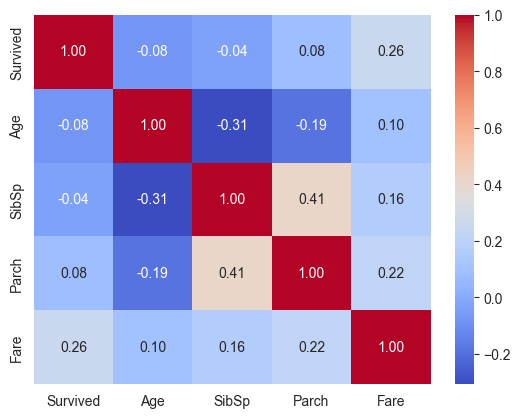

In [5]:
g = sns.heatmap(train_data[['Survived', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), annot=True, fmt=".2f", cmap="coolwarm")

SibSP

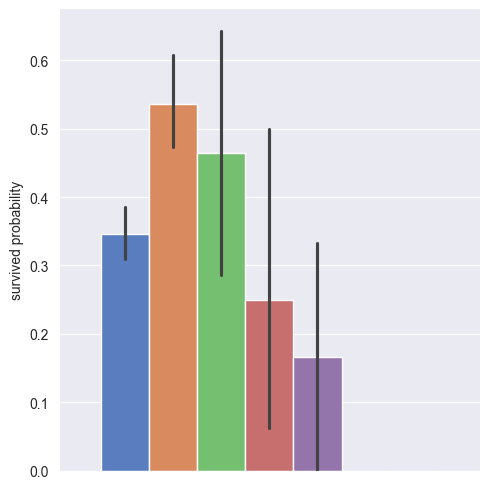

In [6]:
g = sns.catplot(hue="SibSp", y="Survived", data=train_data, kind="bar", palette="muted", legend=False)
g = g.set_ylabels("survived probability")

Parch

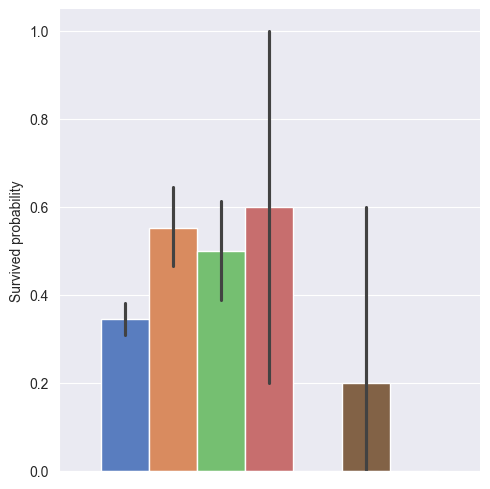

In [7]:
g = sns.catplot(hue="Parch", y="Survived", data=train_data, kind="bar", palette="muted", legend=False)
g = g.set_ylabels("Survived probability")

Age

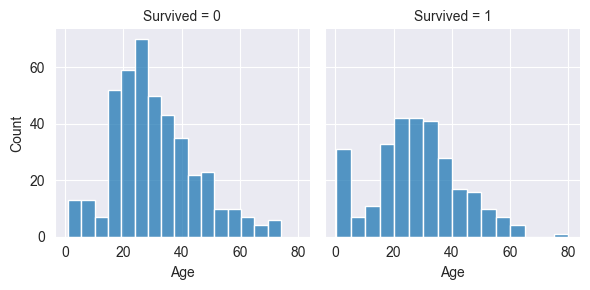

In [8]:
g = sns.FacetGrid(data=train_data, col="Survived")
g = g.map(sns.histplot  , "Age")

Fare

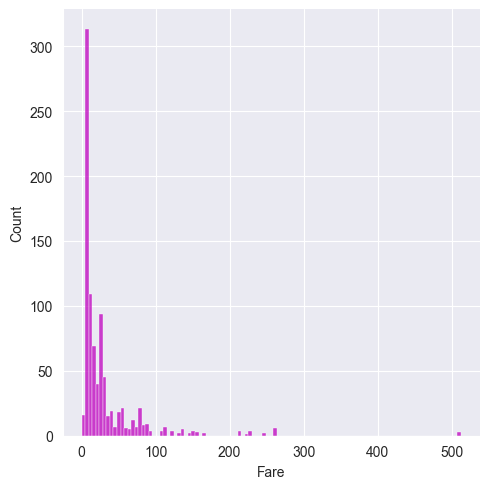

In [9]:
g = sns.displot(train_data["Fare"], color="m", label="Skewness: %.2f"%(train_data["Fare"].skew()))

In [10]:
# Apply log to Fare to reduce skewness distribution
train_data["Fare"] = train_data["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

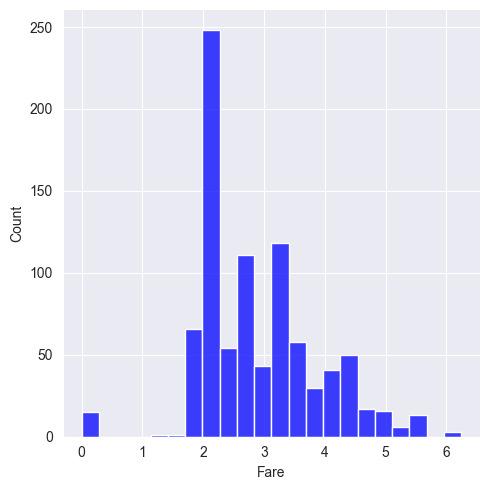

In [11]:
g = sns.displot(train_data["Fare"], color="b", label="Skewness: %.2f"%(train_data["Fare"].skew()))

Categorical variables

In [12]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S


Sex

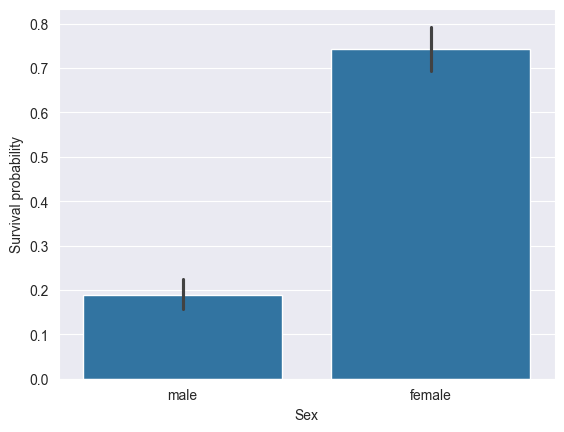

In [13]:
g = sns.barplot(x="Sex", y="Survived", data=train_data)
g = g.set_ylabel("Survival probability")

In [14]:
train_data[["Sex", "Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


Pclass

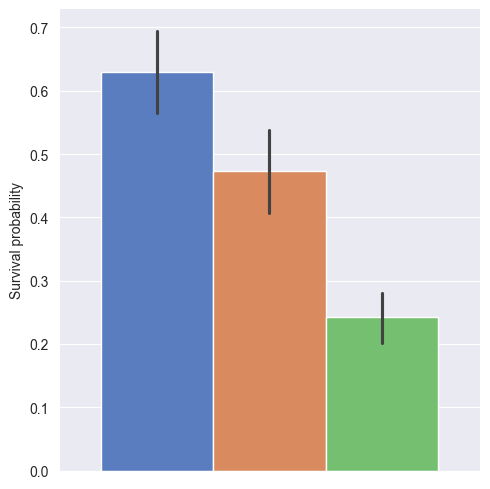

In [15]:
g = sns.catplot(hue="Pclass", y="Survived", data=train_data, kind="bar", palette="muted", legend=False)
g = g.set_ylabels("Survival probability")

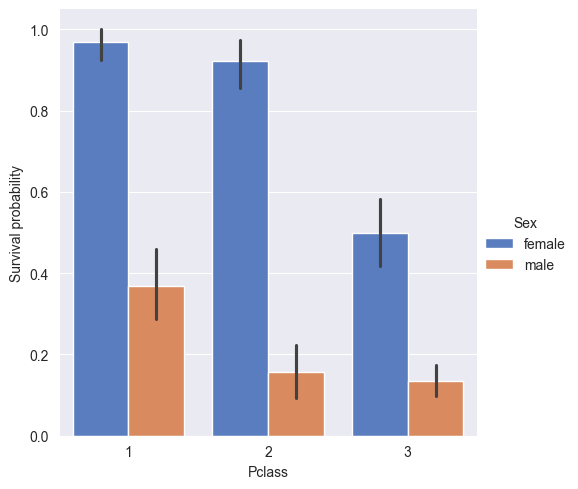

In [16]:
# Pclass vs Survived by Sex
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=train_data, kind="bar", palette="muted")
g = g.set_ylabels("Survival probability")

Embarked

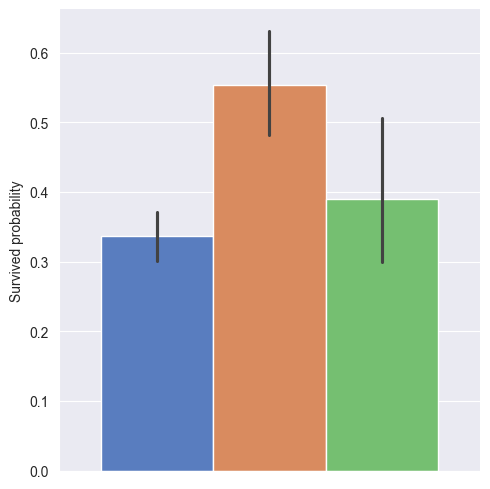

In [17]:
# Explore Embarked vs Survived
g = sns.catplot(hue="Embarked", y="Survived", data=train_data, kind="bar", palette="muted", legend=False)
g = g.set_ylabels("Survived probability")

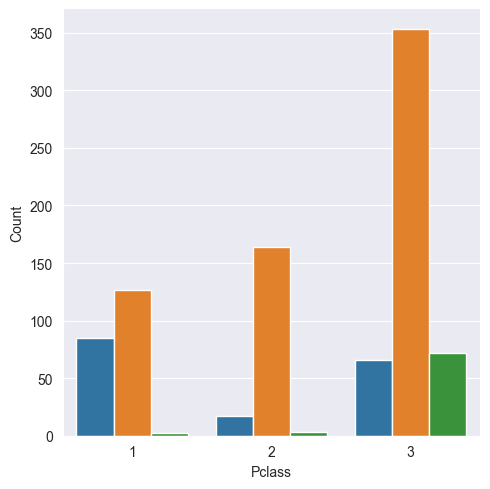

In [18]:
# Explore Embarked vs Pclass
g = sns.catplot(x="Pclass", hue="Embarked", data=train_data, kind="count", legend=False)
g = g.set_ylabels("Count")

Preprocessing

In [19]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S


In [20]:
# Drop Cabin column (687/891) missing values
train_data = train_data.drop(['Cabin', 'Age', 'Name', 'Ticket'], axis=1)
test_data = test_data.drop(['Cabin', 'Age', 'Name', 'Ticket'], axis=1)

# Fill embarked nan values of dataset set with 'S', most frequent value
train_data['Embarked'] = train_data['Embarked'].fillna('S')

# Fill fare nan values of dataset set with 2, most frequent value
test_data['Fare'] = test_data['Fare'].fillna(2)

In [21]:
from sklearn.preprocessing import OneHotEncoder

# Convert categorical data (Sex and Embarked) one-hot-encoding
object_cols = ['Sex', 'Embarked']
new_cols_name = ['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_data[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(test_data[object_cols]))

OH_cols_train.columns = new_cols_name
OH_cols_valid.columns = new_cols_name

num_X_train = train_data.drop(object_cols, axis=1)
num_X_valid = test_data.drop(object_cols, axis=1)

train_data = pd.concat([num_X_train, OH_cols_train], axis=1)
test_data = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [22]:
train_data.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,0,1.981001,0.0,1.0,0.0,0.0,1.0
1,2,1,1,1,0,4.266662,1.0,0.0,1.0,0.0,0.0
2,3,1,3,0,0,2.070022,1.0,0.0,0.0,0.0,1.0
3,4,1,1,1,0,3.972177,1.0,0.0,0.0,0.0,1.0
4,5,0,3,0,0,2.085672,0.0,1.0,0.0,0.0,1.0


In [23]:
target = train_data['Survived']
train_data = train_data.drop('Survived', axis=1)

In [24]:
test_data.head()

,PassengerId,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,0,7.8292,0.0,1.0,0.0,1.0,0.0
1,893,3,1,0,7.0000,1.0,0.0,0.0,0.0,1.0
2,894,2,0,0,9.6875,0.0,1.0,0.0,1.0,0.0
3,895,3,0,0,8.6625,0.0,1.0,0.0,0.0,1.0
4,896,3,1,1,12.2875,1.0,0.0,0.0,0.0,1.0


In [25]:
train_data.isnull().sum()

PassengerId    0
Pclass         0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [26]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

Search the best hyperparameters for Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
rf = RandomForestClassifier(max_features=11, oob_score=True, random_state=1, n_jobs=-1)

param_grid = {"criterion": ["gini", "entropy"], "min_samples_leaf": [1, 5, 10], "min_samples_split": [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, error_score='raise')

gs = gs.fit(train_data, target)

print("Best score:", gs.best_score_)
print("Best params:", gs.best_params_)
print("CV result:", gs.cv_results_)

Best score: 0.7901234567901234
Best params: {'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 16, 'n_estimators': 700}
CV result: {'mean_fit_time': array([ 0.53675413,  0.76755921,  5.23269002,  8.16185474, 10.91031941,
        0.79316608,  1.48354141,  4.43881567,  6.92316175,  9.97961617,
        0.52504675,  0.75754062,  4.11649601,  8.50756097,  9.08691343,
        0.64873997,  1.34797057,  3.48936041,  7.322872  ,  8.9446195 ,
        0.53766759,  0.94039162,  4.29306952,  7.25275819,  8.78159833,
        0.42684245,  0.60539198,  3.9596467 ,  7.59996168,  9.5332667 ,
        0.56127604,  1.02148906,  3.70926515,  7.37447604,  8.28446388,
        0.45336159,  0.8520298 ,  3.52304244,  6.7699906 ,  7.73170479,
        0.44516587,  0.7843926 ,  3.6813395 ,  6.97233812,  7.92401695,
        0.3405927 ,  0.71355923,  3.08771563,  6.95962477,  7.52414672,
        0.31987341,  0.77170388,  3.1982975 ,  6.24384387,  6.8177077 ,
        0.29322553,  0.58576973,  3.16146

Train model

In [29]:
train_data.head()

,PassengerId,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,0,1.981001,0.0,1.0,0.0,0.0,1.0
1,2,1,1,0,4.266662,1.0,0.0,1.0,0.0,0.0
2,3,3,0,0,2.070022,1.0,0.0,0.0,0.0,1.0
3,4,1,1,0,3.972177,1.0,0.0,0.0,0.0,1.0
4,5,3,0,0,2.085672,0.0,1.0,0.0,0.0,1.0


In [30]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [31]:
test_data.head()

,PassengerId,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,0,7.8292,0.0,1.0,0.0,1.0,0.0
1,893,3,1,0,7.0000,1.0,0.0,0.0,0.0,1.0
2,894,2,0,0,9.6875,0.0,1.0,0.0,1.0,0.0
3,895,3,0,0,8.6625,0.0,1.0,0.0,0.0,1.0
4,896,3,1,1,12.2875,1.0,0.0,0.0,0.0,1.0


In [32]:
# rf = RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=200, n_jobs=-1, random_state=0)
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=16, n_estimators=700, n_jobs=-1, random_state=0)
# Best params: {'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 16, 'n_estimators': 700}

rf.fit(train_data, target)
predictions = rf.predict(test_data)

In [33]:
# import xgboost as xgb
# 
# gbm = xgb.XGBClassifier(
#     n_estimators= 2000,
#     max_depth= 4,
#     min_child_weight= 2,
#     gamma=0.9,                        
#     subsample=0.8,
#     colsample_bytree=0.8,
#     objective= 'binary:logistic',
#     nthread= -1,
#     scale_pos_weight=1).fit(train_data, target)
# 
# predictions = gbm.predict(test_data)

Save prediction to csv file

In [34]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

print("Your submission was successfully saved!")

Your submission was successfully saved!


Check output

In [35]:
results = pd.read_csv('submission.csv')
print(results['Survived'].value_counts())
results.head()

Survived
0    273
1    145
Name: count, dtype: int64


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
